<a href="https://colab.research.google.com/github/sarayaghoubi/sarayaghoubi/blob/main/tabular_data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np

In [2]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [3]:
!pip uninstall -y torchtext
!pip uninstall torchmetrics
!pip install torchmetrics==0.05

Found existing installation: torchtext 0.13.1
Uninstalling torchtext-0.13.1:
  Successfully uninstalled torchtext-0.13.1
Found existing installation: torchmetrics 0.5.0
Uninstalling torchmetrics-0.5.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/integrations/*
    /usr/local/lib/python3.7/dist-packages/torchmetrics-0.5.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/torchmetrics/*
Proceed (y/n)? y
  Successfully uninstalled torchmetrics-0.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torchmetrics-0.5.0-py3-none-any.whl (272 kB)


In [4]:
# !pip install torchensemble
# !pip install tab-transformer-pytorch
!  pip install pytorch_tabular

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. Looking into our the data :

In [5]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
features = train.columns
train.describe()

,TWAP,Support,Shear_index,Convergence,LR5min,LR10min,Loading,Conv_Rate,Canopy_Angle,Height_At_Set,Duration Hour,count,ASQ Cycle time 300 bar,ASQ Cycle time 350 bar,Available Ringmain Hi Set Pressure at Set,Available Ringmain System Pressure at Set,Cavity,label
count,93221.000000,95253.000000,95253.000000,89489.000000,92791.000000,94240.000000,93559.000000,89278.000000,93994.000000,89840.000000,95253.000000,95253.000000,92284.000000,84386.000000,73812.000000,87198.000000,95253.000000,95253.000000
mean,402.754407,85.986100,309.753058,-15.192005,2.847976,1.758376,1.970111,-0.159272,0.804571,4095.538331,3.125441,1.140353,19.290551,27.980502,380.836131,310.320485,0.004619,0.003958
std,61.797151,48.823859,166.614056,21.023250,3.365298,1.919631,2.694158,0.236887,3.262901,225.712669,5.670643,0.657760,15.476090,25.123865,13.104803,16.852913,0.067808,0.062787
min,0.000000,1.000000,1.000000,-392.020951,-14.977216,-9.971390,-9.981551,-4.727494,-19.616398,3012.930070,0.030000,0.000000,5.005981,5.023453,250.242679,200.051632,0.000000,0.000000
25%,385.502281,44.000000,166.000000,-24.067196,0.351303,0.330002,0.323079,-0.252881,-1.109236,3963.821784,0.970000,1.000000,12.700325,16.481722,377.383475,303.642501,0.000000,0.000000
50%,414.977993,86.000000,311.000000,-11.921515,2.134440,1.569147,1.133918,-0.114945,0.949323,4110.025320,1.750000,1.000000,16.030663,20.071526,383.479506,313.379032,0.000000,0.000000
75%,443.331784,128.000000,453.000000,-3.206217,4.764956,2.873272,2.642608,-0.027174,2.750112,4239.870775,2.970000,1.000000,19.401081,25.399559,387.929918,321.167966,0.000000,0.000000
max,485.938789,173.000000,600.000000,99.951309,19.876201,18.743433,19.968056,1.493539,19.758406,4980.644652,85.900000,16.000000,120.000000,120.000000,417.574657,345.081295,1.000000,1.000000


check number of nan values in each column:

In [6]:
train.isna().sum()

TWAP                                          2032
Support                                          0
Shear_index                                      0
Convergence                                   5764
LR5min                                        2462
LR10min                                       1013
Loading                                       1694
Conv_Rate                                     5975
Canopy_Angle                                  1259
Height_At_Set                                 5413
Duration Hour                                    0
count                                            0
ASQ Cycle time 300 bar                        2969
ASQ Cycle time 350 bar                       10867
Available Ringmain Hi Set Pressure at Set    21441
Available Ringmain System Pressure at Set     8055
Cavity                                           0
label                                            0
dtype: int64

plot the data distribution:

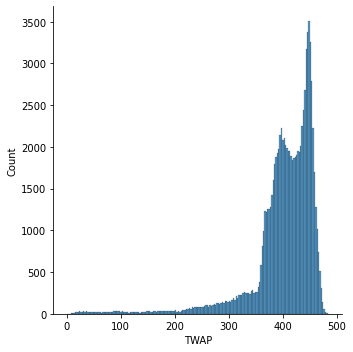

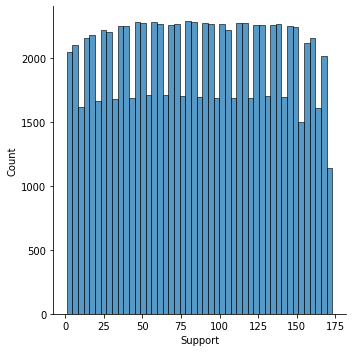

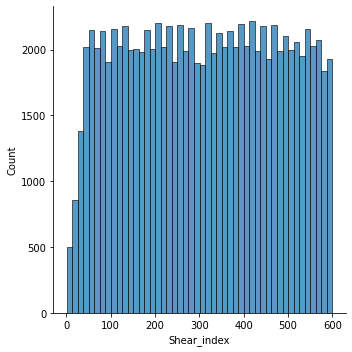

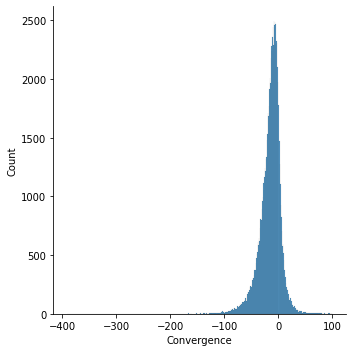

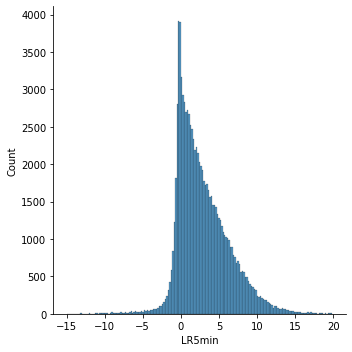

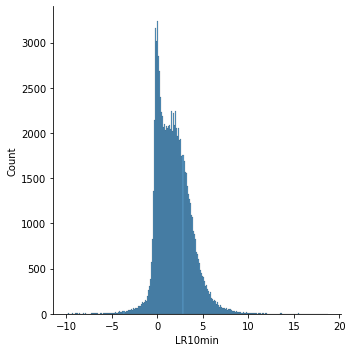

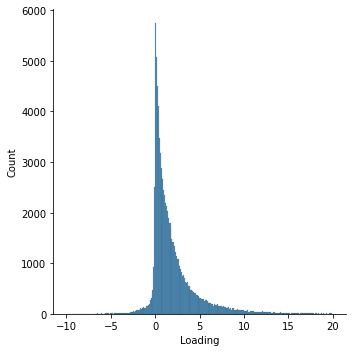

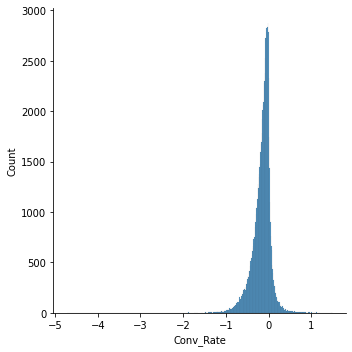

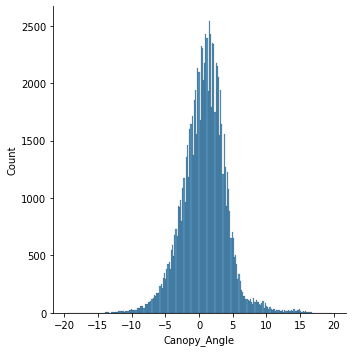

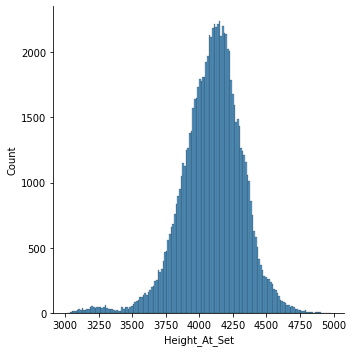

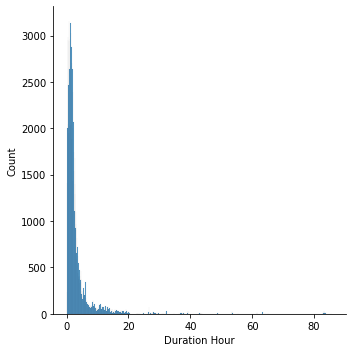

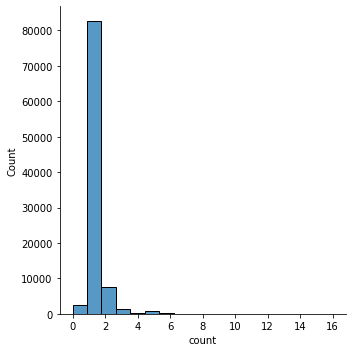

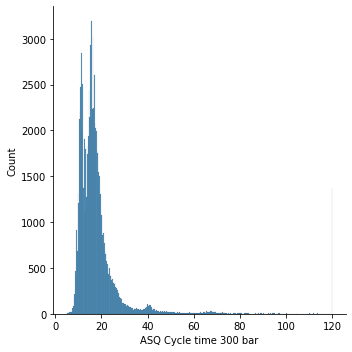

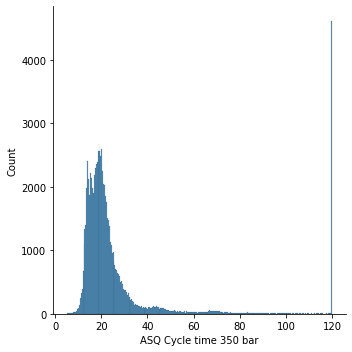

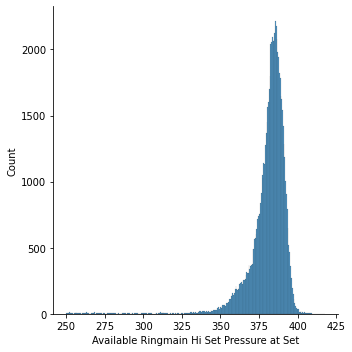

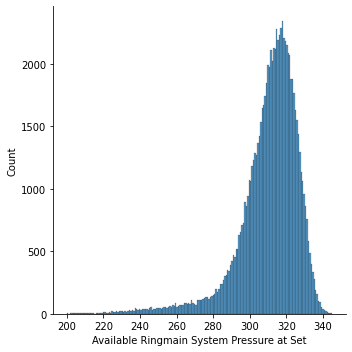

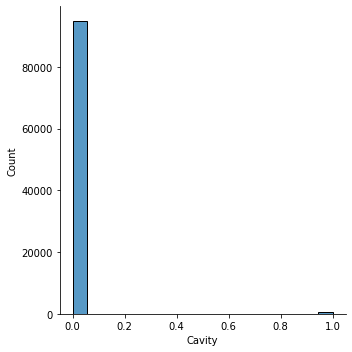

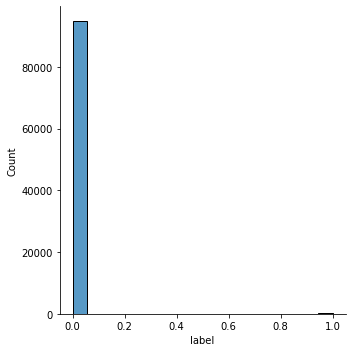

In [7]:
for f in features:
    sns.displot(train[f])
    plt.show()

As we have unbalanced data set we need to check the ratio of existing labels:



In [8]:
z_l = train[train['label']==0]
o_l = train[train['label']==1]
print(f'number of 0 labels: {len(z_l)} and numbe of labels annotated with 1: {len(o_l)}')
len(z_l)/len(o_l)

number of 0 labels: 94876 and numbe of labels annotated with 1: 377


251.6604774535809

In [9]:
# t see the correlation between ariables :
train.corr()

,TWAP,Support,Shear_index,Convergence,LR5min,LR10min,Loading,Conv_Rate,Canopy_Angle,Height_At_Set,Duration Hour,count,ASQ Cycle time 300 bar,ASQ Cycle time 350 bar,Available Ringmain Hi Set Pressure at Set,Available Ringmain System Pressure at Set,Cavity,label
TWAP,1.000000,0.002531,0.125214,-0.202061,0.456420,0.408030,0.422715,-0.138553,0.162402,-0.087344,-0.069165,0.016473,-0.320972,-0.292324,-0.046384,-0.099375,-0.359334,-0.042533
Support,0.002531,1.000000,0.004365,-0.065578,0.103711,0.129407,0.129135,0.024276,-0.044671,-0.011912,0.012598,-0.002979,0.046772,0.043256,-0.053302,-0.018783,-0.025330,-0.008006
Shear_index,0.125214,0.004365,1.000000,-0.137422,0.055331,0.098960,0.106046,-0.082957,-0.019566,0.109104,-0.025230,-0.026071,-0.039992,-0.027993,-0.024701,0.203032,0.040448,0.029759
Convergence,-0.202061,-0.065578,-0.137422,1.000000,-0.234250,-0.279189,-0.286169,0.597712,-0.073947,0.050725,-0.061429,0.014714,0.030441,0.028506,0.000959,0.038244,0.041238,-0.005694
LR5min,0.456420,0.103711,0.055331,-0.234250,1.000000,0.505213,0.712744,-0.207983,0.165085,-0.164567,-0.124340,0.013139,-0.057943,-0.068498,-0.037014,-0.120547,-0.040017,-0.010548
LR10min,0.408030,0.129407,0.098960,-0.279189,0.505213,1.000000,0.642709,-0.237249,0.136709,-0.152415,-0.113691,0.003291,-0.042625,-0.061334,-0.027116,-0.094602,-0.044261,0.001759
Loading,0.422715,0.129135,0.106046,-0.286169,0.712744,0.642709,1.000000,-0.285930,0.137525,-0.129384,-0.122460,0.000065,-0.056459,-0.082666,-0.039786,-0.103625,-0.046198,-0.010881
Conv_Rate,-0.138553,0.024276,-0.082957,0.597712,-0.207983,-0.237249,-0.285930,1.000000,-0.054558,0.003465,0.179376,0.015394,0.034486,0.030998,0.054362,0.069075,0.035143,0.007235
Canopy_Angle,0.162402,-0.044671,-0.019566,-0.073947,0.165085,0.136709,0.137525,-0.054558,1.000000,-0.309349,-0.049372,0.011489,-0.052404,-0.013879,-0.056941,-0.120418,-0.064364,0.026515
Height_At_Set,-0.087344,-0.011912,0.109104,0.050725,-0.164567,-0.152415,-0.129384,0.003465,-0.309349,1.000000,0.027104,0.000070,-0.083036,-0.082159,0.019444,0.146310,0.066730,0.028463


# 2. Cleaning the data
* 2.1. starts with columns : 
> **['LR5min','LR10min', 'Loading', 'Convergence','Conv_Rate', 'Canopy_Angle', 'Height_At_Set']** 
> that has almost like normal  distribution or skewed that makes the 'mean/median imputation a good candid


* *  impute NaN values with mean
* *  then, remove 5 percentile from the dataset
* 2.2 then impute the column "TWAP" as has more correlation with other columsn and their indexes 
* 2.3 finally fill the nan values from columns with KNN method:
> **[ASQ Cycle time 300 bar, ASQ Cycle time 350 bar, Available Ringmain Hi Set Pressure at Set]**




In [10]:

features_median = ['LR5min','LR10min', 'Loading']
features_avg = ['Convergence','Conv_Rate', 'Canopy_Angle', 'Height_At_Set']

def fill_na(input, s = 12,mapping = None, reference = None, imputer_ASQ=None, drop = False):
    if mapping is None:
        mapping = {}
        for c in input.columns:
            if c in features_median:
                mapping[c] = input[c].median()
            elif c in features_avg:
                mapping[c] = input[c].mean()
                
    def remove_outliers(df, p):
        Q1 = df.quantile(p)
        Q3 = df.quantile(1-p)
        return df.drop(df.loc[(df<Q1) | (df>Q3)].index)

    for f in input.columns:
        if (f in features_median) or (f in features_avg):
            # input[f] = remove_outliers(input[f],0.001)
            input[f].fillna(mapping[f], inplace=True)
    # impute 'TWAP' Nan values with the average of its neighbours having same index
    if reference is None:
        mean_by_index = input.groupby(['Shear_index']).mean()
        reference = input[['Shear_index','TWAP']]
        for index, row in mean_by_index.iterrows():
            # input[f] = remove_outliers(input[f],0.001)
            reference[reference['Shear_index']==index] = row.TWAP
    input['TWAP'].fillna(reference['TWAP'],inplace = True)
    # input['TWAP'] = remove_outliers(input[f],0.001)
    # predicting the other columns with KNN
    col_drop = ['label','Shear_index','Support','Cavity'] if drop else ['label']
    X_d = input.drop(columns=col_drop)
    
    if imputer_ASQ is None:
        imputer_ASQ = KNNImputer(n_neighbors=int(s))
        # fit on the dataset
        imputer_ASQ.fit(X_d)
    # transform the dataset
    X = imputer_ASQ.transform(X_d)
    X_d = pd.DataFrame(X, columns = X_d.columns)
    y = np.array(input['label'])
    return X_d,y, mapping, reference, imputer_ASQ

Normalizing the data and scaling them

In [12]:
from sklearn.preprocessing import PowerTransformer, Normalizer,KBinsDiscretizer
X_d,y,mapping, ref, imputer = fill_na(train,12,None,None,None,True)
P_scale = ['TWAP','count','Convergence', 'LR5min', 'LR10min', 'Loading', 'Conv_Rate', 'Canopy_Angle'] 	 	 	 	 	 	 	
N_scale  =['Height_At_Set','Duration Hour','ASQ Cycle time 300 bar','ASQ Cycle time 350 bar','Available Ringmain Hi Set Pressure at Set','Available Ringmain System Pressure at Set']
P_transformer = PowerTransformer().fit(X_d[P_scale])
N_transformer = Normalizer().fit(X_d[N_scale])
X_d[P_scale] = P_transformer.transform(X_d[P_scale])
X_d[N_scale] = N_transformer.transform(X_d[N_scale])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_array(key, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3063: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

# **3. Combine over- and under-sampling using SMOTE and Tomek links.**

In [13]:

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_s, Y_s = resample.fit_resample(X_d,y)

## 3. Selecting and removing some of the features:
We will have different 5 data and 5 models
to construct our model 
>    * first find the importance of each feature
>    * then select features with highest importance score
>    * then find their correlation with other features and drop those that has high correlation


Feature: 0, Score: 0.09051
Feature: 1, Score: 0.06058
Feature: 2, Score: 0.07116
Feature: 3, Score: 0.07584
Feature: 4, Score: 0.08944
Feature: 5, Score: 0.06166
Feature: 6, Score: 0.11479
Feature: 7, Score: 0.04497
Feature: 8, Score: 0.08081
Feature: 9, Score: 0.00923
Feature: 10, Score: 0.07583
Feature: 11, Score: 0.07788
Feature: 12, Score: 0.09924
Feature: 13, Score: 0.04803


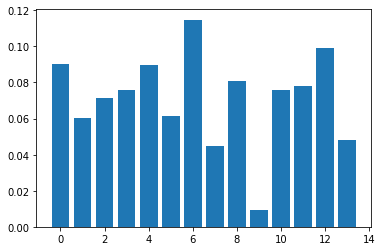

In [14]:
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# fit the model
model.fit(X_d, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
importance__dict = {}
for i,v in enumerate(importance):
    importance__dict[f'{i}'] = v
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
# plot the correlation between features in order to better split the dataset that features may have the least coverage(intersection)
map_corr = X_d.corr().abs()

In [15]:
#preparing the test data:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
x_test,y_test,_,_,_ = fill_na(test,12,mapping, ref, imputer)
x_test[P_scale] = P_transformer.transform(x_test[P_scale])
x_test[N_scale] = N_transformer.transform(x_test[N_scale])

4. implementing the model and evaluation:
* Neural Oblivious Decision Ensembles for Deep Learning on Tabular Data is a model presented in ICLR 2020 and according to the authors have beaten well-tuned Gradient Boosting models on many datasets. It uses a Neural equivalent of Oblivious Trees(the kind of trees Catboost uses) as the basic building blocks of the architecture.
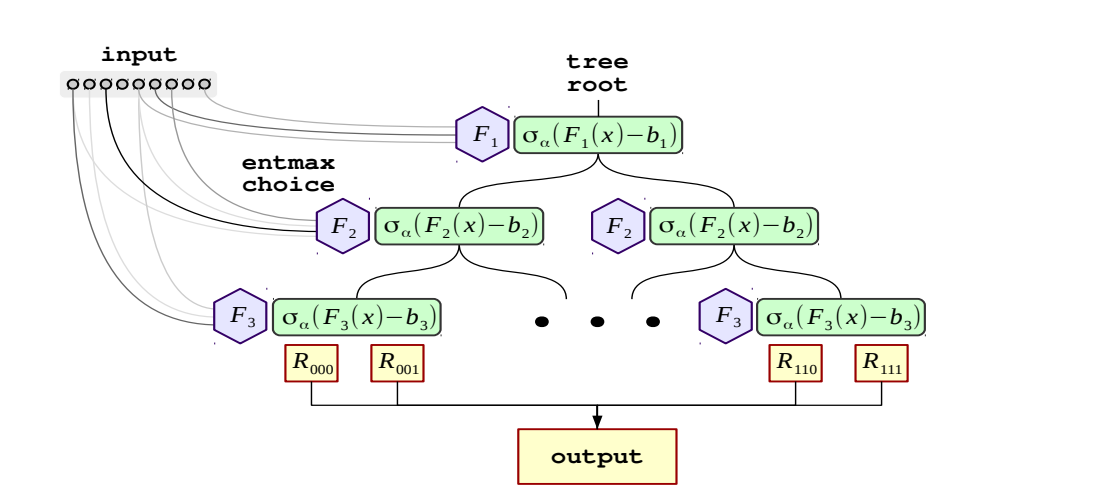

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import random
import numpy as np
import pandas as pd
import os
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig, NodeConfig, TabNetModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.categorical_encoders import CategoricalEmbeddingTransformer

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if not IN_COLAB:
    os.chdir("..")
%load_ext autoreload
%autoreload 2
data = X_s.join(pd.DataFrame(Y_s,columns = ['label']))
num_col_names = X_d.columns.tolist()
x_train, x_val = train_test_split(data, random_state=42)

data_config = DataConfig(
    target=['label'], #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    continuous_cols=num_col_names
)
trainer_config = TrainerConfig(
    auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=1024,
    max_epochs=1000,
    auto_select_gpus=False,
    gpus=0, #index of the GPU to use. 0, means CPU
)
optimizer_config = OptimizerConfig()
model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="4096-4096-512",  # Number of nodes in each layer
    activation="LeakyReLU", # Activation between each layers
    learning_rate = 1e-3,
    metrics=["accuracy"]
)
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=x_train, validation=x_val)
result = tabular_model.evaluate(x_test)
print(result)
pred_df = tabular_model.predict(x_test)
pred_df.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


INFO:pytorch_lightning.utilities.seed:Global seed set to 42
INFO:pytorch_lightning.utilities.distributed:GPU available: False, used: False
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.core.lightning:
  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 0     
1 | normalizing_batch_norm | BatchNorm1d         | 28    
2 | backbone               | FeedForwardBackbone | 18.9 M
3 | output_layer           | Linear              | 1.0 K 
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
18.9 M    Trainable params
0         Non-trainable params
18.9 M    Total params
75.766    Total estimated model params size (MB)
INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.tuner.lr_finder:LR finder stopped early after 89 steps due to diverging loss.
INFO:pytorch_lightning.utilities.distributed:Restored states from the checkpoint file at /content/lr_find_temp_model.ckpt
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.000630957344480193
INFO:pytorch_lightning.core.lightning:
  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 0     
1 | normalizing_batch_norm | BatchNorm1d         | 28    
2 | backbone               | FeedForwardBackbone | 18.9 M
3 | output_layer           | Linear              | 1.0 K 
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
18.9 M    Trainable params
0         Non-trainable params
18.9 M    Total params
75.766    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Training: 88it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [17]:
import torch
torch.__version__

'1.12.1+cu113'